# AutoML by PyCaret

In this notebook I will use an AutoML package called PyCaret to enter '30 Days of ML' competitions with structured data. If you use this package, you can easily make prediction without any feature engineering and trained the models without model tuning. I just want to see which regression model learns better in this data. Then, I will use 'Bayesian Optimization' which is a sequential design strategy for global optimization of black-box functions that does not assume any functional forms. So, I expect better scores if we engineer additional feature and tune the models. 




## Define your path

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/kaggle/'

In [ ]:
import os
os.listdir(path)

['sample_submission.csv',
 'test.csv',
 'train.csv',
 'submission_tuned_lgbm.csv',
 'submission_blender.csv',
 'submission_stacker.csv']

## Read Data

In [ ]:
import pandas as pd
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

## hecking the shapes of data

In [ ]:
print(train.shape)
print(test.shape)
print(submission.shape)

(300000, 26)
(200000, 25)
(200000, 2)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [ ]:
train=train.iloc[:,1:]
test=test.iloc[:,1:]

## Install PyCaret

In [ ]:
!pip install pycaret

     |████████████████████████████████| 264 kB 12.1 MB/s 
     |████████████████████████████████| 1.3 MB 84.0 MB/s 
     |████████████████████████████████| 108 kB 82.6 MB/s 
     |████████████████████████████████| 14.6 MB 38.3 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 271 kB 64.8 MB/s 
     |████████████████████████████████| 6.8 MB 88.3 MB/s 
     |████████████████████████████████| 2.0 MB 72.9 MB/s 
     |████████████████████████████████| 248 kB 79.6 MB/s 
     |████████████████████████████████| 1.7 MB 68.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 75.9 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |████████████████████████████████| 636 kB 69.2 MB/s 
     |████████████████████████████████| 10.1 MB 57.6 MB/s 
     |███████████████

## Import methods for regression problem

In [ ]:
from pycaret.regression import *

## Setup the environment

- In PyCaret you have to setup the environment before experimenting with the models. It can be done by using 'setup' method. 
- In setup stage, PyCaret automatically interprets column types of the given data and asks the user if it has intepreted it correctly. You can customize whether you want each columns to be interpreted differently by using the parameters in setup method. In this tutorial we will just go with the automatic interpretation by pressing 'enter'. 
- Also, it asks the ratio of dataset used to contruct train/validation sets. We will use 100% of the dataset so just press 'enter' again. 

In [ ]:
# Please put the name of column you want to predict in the target variable.

reg_ = setup(data = train, target = 'target', session_id=123, n_jobs=-1, fold=3,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05, 
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  use_gpu = True, log_experiment = True)

,Description,Value
0,session_id,123
1,Target,target
2,Original Data,"(300000, 25)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(209999, 67)"


## Train models and compare

- Now we have constructed the environment, we will now train and compare the default models provided in PyCaret
- By using 'compare_models' method we can easily train and compare 16 default models provided in the package
- We will select top 3 models in terms of RMSE, that is because the evaluation metric for this competition is RMSE

In [ ]:
best_3_ = compare_models(sort = 'RMSE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5758,0.5264,0.7255,0.0537,0.0789,0.0708,1.6833
gbr,Gradient Boosting Regressor,0.5796,0.5339,0.7307,0.0402,0.0795,0.0712,106.8833
rf,Random Forest Regressor,0.5832,0.5406,0.7352,0.0282,0.0800,0.0717,135.5367
lr,Linear Regression,0.5846,0.5438,0.7374,0.0223,0.0802,0.0719,0.4567
ridge,Ridge Regression,0.5846,0.5438,0.7374,0.0223,0.0802,0.0719,0.4000
br,Bayesian Ridge,0.5845,0.5437,0.7374,0.0225,0.0802,0.0719,0.8267
huber,Huber Regressor,0.5840,0.5447,0.7380,0.0208,0.0802,0.0717,8.9500
et,Extra Trees Regressor,0.5869,0.5477,0.7400,0.0154,0.0805,0.0722,81.0867
omp,Orthogonal Matching Pursuit,0.5865,0.5477,0.7401,0.0153,0.0805,0.0721,0.3933
lasso,Lasso Regression,0.5907,0.5564,0.7459,-0.0003,0.0812,0.0727,0.3500


- Light Gradient Boosting Machine, Gradient Boosting Regressor, and Random Forest Regressor	are the best 3 models.
- The boosting model had good performance.

In [ ]:
lgbm = create_model('lightgbm', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5762,0.5273,0.7262,0.0581,0.0794,0.071


In [ ]:
gbr = create_model('gbr', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5811,0.5369,0.7327,0.041,0.0802,0.0716


In [ ]:
rf = create_model('rf', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5839,0.5424,0.7365,0.0312,0.0806,0.072


## Hyperparameter Tuning

- It automatically tunes the hyperparameters of the three selected models.

In [ ]:
tuned_lgbm = tune_model(lgbm, optimize = 'RMSE', n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5744,0.5198,0.7209,0.0616,0.0780,0.0701
1,0.5744,0.5228,0.7231,0.0632,0.0786,0.0703
2,0.5718,0.5205,0.7214,0.0652,0.0789,0.0709
Mean,0.5736,0.5210,0.7218,0.0634,0.0785,0.0704
SD,0.0012,0.0013,0.0009,0.0015,0.0004,0.0004


In [ ]:
tuned_gbr = tune_model(gbr, optimize = 'RMSE', n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5750,0.5216,0.7222,0.0583,0.0781,0.0701
1,0.5755,0.5251,0.7246,0.0591,0.0787,0.0705
2,0.5732,0.5230,0.7232,0.0607,0.0791,0.0711
Mean,0.5746,0.5232,0.7233,0.0594,0.0787,0.0706
SD,0.0010,0.0014,0.0010,0.0010,0.0004,0.0004


In [ ]:
tuned_rf = tune_model(rf, optimize = 'RMSE', n_iter = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5904,0.5541,0.7444,-0.0004,0.0806,0.0721
1,0.5917,0.5582,0.7471,-0.0001,0.0813,0.0726
2,0.5901,0.5569,0.7462,-0.0002,0.0816,0.0733
Mean,0.5907,0.5564,0.7459,-0.0002,0.0812,0.0727
SD,0.0007,0.0017,0.0011,0.0001,0.0004,0.0005


## Model Ensemble


- We will now ensemble the three models. In order to optimize the score for this competition we have to predict probabilities, we we will ensemble the three models using 'blend_models' method.


In [ ]:
blender_specific = blend_models(estimator_list = [tuned_lgbm,tuned_gbr,tuned_rf], optimize = 'RMSE', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5734,0.5190,0.7204,0.0563,0.0778,0.0699
1,0.5775,0.5288,0.7272,0.0546,0.0791,0.0707
2,0.5769,0.5293,0.7275,0.0560,0.0790,0.0706
3,0.5740,0.5250,0.7245,0.0574,0.0793,0.0717
4,0.5731,0.5223,0.7227,0.0580,0.0787,0.0704
Mean,0.5750,0.5249,0.7245,0.0565,0.0788,0.0707
SD,0.0018,0.0039,0.0027,0.0012,0.0005,0.0006


## Prediction

- We will use the ensembled model on predicting unseen data.
- There is already a hold-out set constucted on our environment so we will test on it to evaluate the performance.

In [ ]:
pred_holdout = predict_model(blender_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.5762,0.5271,0.726,0.0584,0.0794,0.071


- We got a pretty decent model with RMSE of 0.726

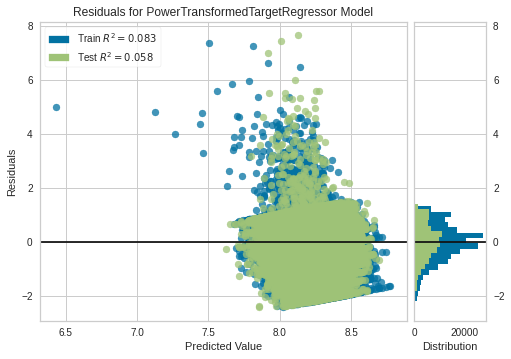

In [ ]:
# residuals

plot_model(blender_specific)

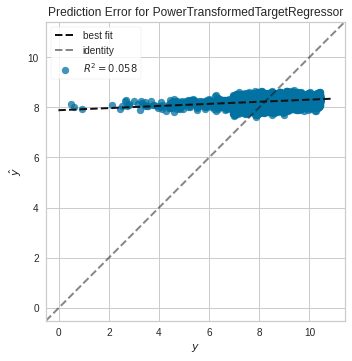

In [ ]:
# error

plot_model(blender_specific, plot='error')

- Train/Test Similar Distribution

- Explanatory ability is very low because not all variables are numerical data.

- Train/Test both appear to need outliers removed.

- It has data structures that violate regression assumptions such as linearity, equivariability, etc.

## Re-training the model on whole data

- Until now we have splitted the given train data into another train / validation sets to experiment. So the models are not trained on the full training data set.
- We will train the model on the whole dataset for the most optimal performance. 

In [ ]:
final_model = finalize_model(blender_specific)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

## Predicting on test set for the competition

- We will now use the re-trained model on the test set for the competition

In [ ]:
pred_holdout = predict_model(final_model, data = test)

In [ ]:
pred_holdout

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,Label
0,B,B,B,C,B,B,A,E,E,I,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702,8.073073
1,A,B,A,C,B,C,A,E,C,H,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940,8.291090
2,B,A,A,A,B,B,A,E,D,K,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099,8.310421
3,B,B,A,C,B,D,A,E,A,N,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372,8.401494
4,B,B,A,C,B,C,A,E,C,F,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412,8.183294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,B,A,A,C,B,D,A,E,E,I,0.505445,0.710839,0.225285,0.932926,0.287454,0.543800,0.682378,1.028978,1.022741,0.683903,0.877273,0.532410,0.605397,0.884581,8.102642
199996,B,A,A,C,B,B,A,E,C,F,0.350751,0.887132,0.346864,0.284264,0.794881,0.432778,0.389775,0.359871,0.550013,0.492082,0.202295,0.416875,0.406205,0.758665,8.332694
199997,A,B,B,C,B,B,A,E,C,I,0.378393,0.549489,0.411319,0.437275,0.514487,0.060997,0.171741,0.317185,0.150340,0.122109,0.390524,0.334026,0.378987,0.839416,8.381840
199998,A,A,A,C,B,D,A,D,A,F,1.014149,0.430139,0.067896,0.393523,0.286144,1.061710,0.819811,0.901241,0.555339,0.844315,0.894193,0.794102,0.844279,0.890473,8.138458


In [ ]:
submission_blender = submission.copy()
submission_blender.iloc[:,1] = pred_holdout.iloc[:,-1]
submission_blender.to_csv('/content/gdrive/MyDrive/kaggle/submission_blender_.csv', index = False)

- The probability values are stored on 'target' column. So we will write them on our submission format and submit on Kaggle.
- You will probabily get around 0.726 RMSE. Similarly, the actual public score is 0.72588.

## Model Stacking

- We will now create a 'stacking model' using four models, including the previous mixed model. Stacking is a method for combining multiple classification or regression models.

- In order to optimize the score for this competition we have to predict probabilities, we will stack predicted value of the three models(gbr, rf, blending model) and predict the data stacked with meta-model(lgbm). I use 'stack_models' method this time.

In [ ]:
stacknet = stack_models(estimator_list = [tuned_gbr,tuned_rf,blender_specific], meta_model = tuned_lgbm, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5741,0.5197,0.7209,0.0616,0.0780,0.0700
1,0.5741,0.5222,0.7227,0.0643,0.0785,0.0703
2,0.5718,0.5204,0.7214,0.0654,0.0789,0.0709
Mean,0.5733,0.5208,0.7216,0.0638,0.0785,0.0704
SD,0.0011,0.0011,0.0007,0.0016,0.0004,0.0004


## Prediction

- We will use the stacking model on predicting unseen data.
- There is already a hold-out set constucted on our environment so we will test on it to evaluate the performance.

In [ ]:
pred_holdout = predict_model(stacknet)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.573,0.5206,0.7215,0.0702,0.0789,0.0705


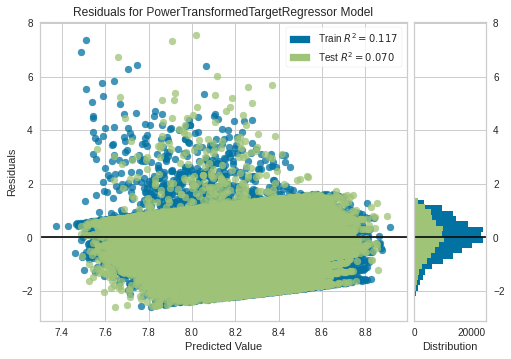

In [ ]:
# 모델 시각화(plot)_plot = 'residuals'

plot_model(stacknet)

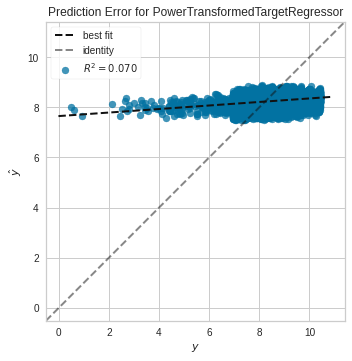

In [ ]:
# 모델 시각화(plot)_plot = 'error'

plot_model(stacknet, plot='error')

- Train/Test Similar Distribution

- It is relatively evenly distributed rather than concentrated on a particular forecast than on the previous ensemble graph.

- But it seems necessary to deal with anomalies.

- The RMSE was better than the previous blending model.

## Re-training the model on whole data
- Until now we have splitted the given train data into another train / validation sets to experiment. So the models are not trained on the full training data set.
- We will train the model on the whole dataset for the most optimal performance. 

In [ ]:
final_model = finalize_model(stacknet)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

## Predicting on test set for the competition
- We will now use the re-trained model on the test set for the competition

In [ ]:
pred_holdout = predict_model(final_model, data = test)

In [ ]:
pred_holdout

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,Label
0,B,B,B,C,B,B,A,E,E,I,0.296227,0.686757,0.587731,0.392753,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702,7.970386
1,A,B,A,C,B,C,A,E,C,H,0.543707,0.364761,0.452967,0.929645,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940,8.372932
2,B,A,A,A,B,B,A,E,D,K,0.408961,0.296129,0.690999,0.740027,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099,8.346240
3,B,B,A,C,B,D,A,E,A,N,1.031239,0.356062,0.303651,0.895591,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372,8.469380
4,B,B,A,C,B,C,A,E,C,F,0.530447,0.729004,0.281723,0.444698,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412,8.197588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,B,A,A,C,B,D,A,E,E,I,0.505445,0.710839,0.225285,0.932926,0.287454,0.543800,0.682378,1.028978,1.022741,0.683903,0.877273,0.532410,0.605397,0.884581,7.992485
199996,B,A,A,C,B,B,A,E,C,F,0.350751,0.887132,0.346864,0.284264,0.794881,0.432778,0.389775,0.359871,0.550013,0.492082,0.202295,0.416875,0.406205,0.758665,8.357067
199997,A,B,B,C,B,B,A,E,C,I,0.378393,0.549489,0.411319,0.437275,0.514487,0.060997,0.171741,0.317185,0.150340,0.122109,0.390524,0.334026,0.378987,0.839416,8.541601
199998,A,A,A,C,B,D,A,D,A,F,1.014149,0.430139,0.067896,0.393523,0.286144,1.061710,0.819811,0.901241,0.555339,0.844315,0.894193,0.794102,0.844279,0.890473,8.076342


In [ ]:
submission_blender = submission.copy()
submission_blender.iloc[:,1] = pred_holdout.iloc[:,-1]
submission_blender.to_csv('/content/gdrive/MyDrive/kaggle/submission_stacker__.csv', index = False)

- The probability values are stored on 'target' column. So we will write them on our submission format and submit on Kaggle.
- You will probabily get around 0.7215 RMSE. Similarly, the actual public score is 0.72060.

- In conclusion, AutoML can easily and quickly use to check data, select models, and tune models with simple codes. It also applied complex models such as blending and stacking model. 

- However, the hyperparameter tuning and model selection required a lot of time and RAM to get the higher score.

- Also, the package is not free to use, which seems to difficult higher scores than current performance. 

- Therefore, it seems useful for identifying data and setting target scores, selecting model simply.


- Reference
    - https://pycaret.org/regression1/
    - https://www.kaggle.com/qkrwlsdn96/automl-by-pycaret-base-pb-score-0-87669